Assignment: Flowers Recognition
Dataset Description:

This dataset contains 4242 images of flowers.
The data collection is based on the data flicr, google images, yandex images.
You can use this datastet to recognize plants from the photo.

Attribute Information:
The pictures are divided into five classes: chamomile, tulip, rose, sunflower, dandelion.
For each class there are about 800 photos. Photos are not high resolution, about 320x240 pixels.
Also explore how to resize images in tensorflow and then resize all the images to a same size.
This is a Multiclass Classification Problem.

WORKFLOW :
Load Data
Split into 60 and 40 ratio.
Encode labels.
Create Model
Compilation Step (Note : Its a Multiclass Classification problem , select loss , metrics according to it)
Train the Model.
If the model gets overfit tune your model by changing the units , No. of layers , epochs , add dropout layer or add Regularizer according to the need .
Prediction should be > 85%
Evaluation Step
Prediction

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import glob as gl
from PIL import Image, ImageOps

In [11]:
ls

 Volume in drive C has no label.
 Volume Serial Number is BC9B-4E79

 Directory of C:\Users\User\Downloads\Flowers

04/09/2021  07:25 PM    <DIR>          .
04/09/2021  07:25 PM    <DIR>          ..
04/08/2021  12:28 PM    <DIR>          .ipynb_checkpoints
03/29/2021  04:52 PM    <DIR>          archive
03/29/2021  03:48 PM       471,666,316 archive.zip
04/09/2021  07:25 PM           558,324 Flowers Recognition.ipynb
04/08/2021  12:39 PM           722,524 Flowers2d.ipynb
03/31/2021  09:51 AM               584 Untitled.ipynb
               4 File(s)    472,947,748 bytes
               4 Dir(s)  211,474,313,216 bytes free


In [12]:
os.listdir('archive\\flowers')

['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']

In [13]:
hwdim = 64
image_new_size = (hwdim, hwdim)
image_array = np.empty(image_new_size)
images_data = np.empty(hwdim * hwdim)
label_data = []
inum = 0

In [14]:
for flower_type in os.listdir('archive\\flowers'):
    flower_directory = 'archive\\flowers\\'+flower_type
    print(flower_directory, '.................................................................')
    for image_name in gl.glob(flower_directory+'\\*jpg'): #os.listdir(flower_directory):
        image = Image.open(image_name)
        image = image.resize(image_new_size)
        image = ImageOps.grayscale(image)
        print(image_name, image.format, image.size, image.mode)
        image_array = np.array(image).reshape(hwdim*hwdim)
        if inum == 0:
            images_data = image_array.copy()
        else:
            images_data = np.vstack([images_data, image_array])
        label_data.append(flower_type)
        print(inum, images_data.shape, image_array.shape, flower_type)
        inum += 1
        

archive\flowers\daisy .................................................................
archive\flowers\daisy\100080576_f52e8ee070_n.jpg None (64, 64) L
0 (4096,) (4096,) daisy
archive\flowers\daisy\10140303196_b88d3d6cec.jpg None (64, 64) L
1 (2, 4096) (4096,) daisy
archive\flowers\daisy\10172379554_b296050f82_n.jpg None (64, 64) L
2 (3, 4096) (4096,) daisy
archive\flowers\daisy\10172567486_2748826a8b.jpg None (64, 64) L
3 (4, 4096) (4096,) daisy
archive\flowers\daisy\10172636503_21bededa75_n.jpg None (64, 64) L
4 (5, 4096) (4096,) daisy
archive\flowers\daisy\102841525_bd6628ae3c.jpg None (64, 64) L
5 (6, 4096) (4096,) daisy
archive\flowers\daisy\10300722094_28fa978807_n.jpg None (64, 64) L
6 (7, 4096) (4096,) daisy
archive\flowers\daisy\1031799732_e7f4008c03.jpg None (64, 64) L
7 (8, 4096) (4096,) daisy
archive\flowers\daisy\10391248763_1d16681106_n.jpg None (64, 64) L
8 (9, 4096) (4096,) daisy
archive\flowers\daisy\10437754174_22ec990b77_m.jpg None (64, 64) L
9 (10, 4096) (4096,) da

archive\flowers\daisy\16819071290_471d99e166_m.jpg None (64, 64) L
144 (145, 4096) (4096,) daisy
archive\flowers\daisy\16833748795_b681b2839f_n.jpg None (64, 64) L
145 (146, 4096) (4096,) daisy
archive\flowers\daisy\169371301_d9b91a2a42.jpg None (64, 64) L
146 (147, 4096) (4096,) daisy
archive\flowers\daisy\17027891179_3edc08f4f6.jpg None (64, 64) L
147 (148, 4096) (4096,) daisy
archive\flowers\daisy\17101762155_2577a28395.jpg None (64, 64) L
148 (149, 4096) (4096,) daisy
archive\flowers\daisy\171972704_389cf7a953.jpg None (64, 64) L
149 (150, 4096) (4096,) daisy
archive\flowers\daisy\17249393016_093e915012_n.jpg None (64, 64) L
150 (151, 4096) (4096,) daisy
archive\flowers\daisy\172882635_4cc7b86731_m.jpg None (64, 64) L
151 (152, 4096) (4096,) daisy
archive\flowers\daisy\17357636476_1953c07aa4_n.jpg None (64, 64) L
152 (153, 4096) (4096,) daisy
archive\flowers\daisy\174131220_c853df1287.jpg None (64, 64) L
153 (154, 4096) (4096,) daisy
archive\flowers\daisy\175106495_53ebdef092_n.jpg

archive\flowers\daisy\33806101464_5eca772954_n.jpg None (64, 64) L
293 (294, 4096) (4096,) daisy
archive\flowers\daisy\33807950584_f5b63715e4_n.jpg None (64, 64) L
294 (295, 4096) (4096,) daisy
archive\flowers\daisy\33809174824_00ba798039_n.jpg None (64, 64) L
295 (296, 4096) (4096,) daisy
archive\flowers\daisy\33809956124_b49dcddf8f_n.jpg None (64, 64) L
296 (297, 4096) (4096,) daisy
archive\flowers\daisy\33810542134_a493f19a71_n.jpg None (64, 64) L
297 (298, 4096) (4096,) daisy
archive\flowers\daisy\33814092924_b23d019011_n.jpg None (64, 64) L
298 (299, 4096) (4096,) daisy
archive\flowers\daisy\33819069114_6ecc240b54_n.jpg None (64, 64) L
299 (300, 4096) (4096,) daisy
archive\flowers\daisy\33822751084_c83a7abffd_n.jpg None (64, 64) L
300 (301, 4096) (4096,) daisy
archive\flowers\daisy\33830843653_ee6d7989fa_n.jpg None (64, 64) L
301 (302, 4096) (4096,) daisy
archive\flowers\daisy\33836936163_2dce95ee4d_n.jpg None (64, 64) L
302 (303, 4096) (4096,) daisy
archive\flowers\daisy\33837577

archive\flowers\daisy\34696729796_190b1dfdf1_n.jpg None (64, 64) L
410 (411, 4096) (4096,) daisy
archive\flowers\daisy\34696730126_056ffea63c_n.jpg None (64, 64) L
411 (412, 4096) (4096,) daisy
archive\flowers\daisy\34696730346_5f0c131e59_n.jpg None (64, 64) L
412 (413, 4096) (4096,) daisy
archive\flowers\daisy\34701078235_4a770d14a1_n.jpg None (64, 64) L
413 (414, 4096) (4096,) daisy
archive\flowers\daisy\34701198765_54aa641d7a_n.jpg None (64, 64) L
414 (415, 4096) (4096,) daisy
archive\flowers\daisy\34718882165_68cdc9def9_n.jpg None (64, 64) L
415 (416, 4096) (4096,) daisy
archive\flowers\daisy\34720703615_bdf1335d8b_n.jpg None (64, 64) L
416 (417, 4096) (4096,) daisy
archive\flowers\daisy\34727863665_b00ac77266_n.jpg None (64, 64) L
417 (418, 4096) (4096,) daisy
archive\flowers\daisy\34729724865_787c98299d_n.jpg None (64, 64) L
418 (419, 4096) (4096,) daisy
archive\flowers\daisy\34733243845_29f1c30634_n.jpg None (64, 64) L
419 (420, 4096) (4096,) daisy
archive\flowers\daisy\34749427

545 (546, 4096) (4096,) daisy
archive\flowers\daisy\4993492878_11fd4f5d12.jpg None (64, 64) L
546 (547, 4096) (4096,) daisy
archive\flowers\daisy\5014137563_d03eb0ed75_n.jpg None (64, 64) L
547 (548, 4096) (4096,) daisy
archive\flowers\daisy\5054771689_00dd40b971_n.jpg None (64, 64) L
548 (549, 4096) (4096,) daisy
archive\flowers\daisy\5058708968_8bdcd29e63_n.jpg None (64, 64) L
549 (550, 4096) (4096,) daisy
archive\flowers\daisy\506018088_4f7a15a7c5_n.jpg None (64, 64) L
550 (551, 4096) (4096,) daisy
archive\flowers\daisy\506348009_9ecff8b6ef.jpg None (64, 64) L
551 (552, 4096) (4096,) daisy
archive\flowers\daisy\5087720485_c0914fb623.jpg None (64, 64) L
552 (553, 4096) (4096,) daisy
archive\flowers\daisy\510844526_858b8fe4db.jpg None (64, 64) L
553 (554, 4096) (4096,) daisy
archive\flowers\daisy\5109508979_68e3530791_m.jpg None (64, 64) L
554 (555, 4096) (4096,) daisy
archive\flowers\daisy\5110105726_53eb7a93be_m.jpg None (64, 64) L
555 (556, 4096) (4096,) daisy
archive\flowers\daisy

666 (667, 4096) (4096,) daisy
archive\flowers\daisy\7133935763_82b17c8e1b_n.jpg None (64, 64) L
667 (668, 4096) (4096,) daisy
archive\flowers\daisy\7188513571_c8527b123a_n.jpg None (64, 64) L
668 (669, 4096) (4096,) daisy
archive\flowers\daisy\7189043225_2fe781439a_n.jpg None (64, 64) L
669 (670, 4096) (4096,) daisy
archive\flowers\daisy\7191221492_610035de7c_m.jpg None (64, 64) L
670 (671, 4096) (4096,) daisy
archive\flowers\daisy\7199968650_72afc16d31_m.jpg None (64, 64) L
671 (672, 4096) (4096,) daisy
archive\flowers\daisy\721595842_bacd80a6ac.jpg None (64, 64) L
672 (673, 4096) (4096,) daisy
archive\flowers\daisy\7227973870_806d9d3e42_n.jpg None (64, 64) L
673 (674, 4096) (4096,) daisy
archive\flowers\daisy\7288989324_c25d9febbf.jpg None (64, 64) L
674 (675, 4096) (4096,) daisy
archive\flowers\daisy\7320089276_87b544e341.jpg None (64, 64) L
675 (676, 4096) (4096,) daisy
archive\flowers\daisy\7335886184_d06a83f640.jpg None (64, 64) L
676 (677, 4096) (4096,) daisy
archive\flowers\dai

787 (788, 4096) (4096,) dandelion
archive\flowers\dandelion\1128626197_3f52424215_n.jpg None (64, 64) L
788 (789, 4096) (4096,) dandelion
archive\flowers\dandelion\11296320473_1d9261ddcb.jpg None (64, 64) L
789 (790, 4096) (4096,) dandelion
archive\flowers\dandelion\11405573_24a8a838cc_n.jpg None (64, 64) L
790 (791, 4096) (4096,) dandelion
archive\flowers\dandelion\11465213433_847c4fa261.jpg None (64, 64) L
791 (792, 4096) (4096,) dandelion
archive\flowers\dandelion\11545123_50a340b473_m.jpg None (64, 64) L
792 (793, 4096) (4096,) dandelion
archive\flowers\dandelion\11595255065_d9550012fc.jpg None (64, 64) L
793 (794, 4096) (4096,) dandelion
archive\flowers\dandelion\11768468623_9399b5111b_n.jpg None (64, 64) L
794 (795, 4096) (4096,) dandelion
archive\flowers\dandelion\11775820493_10fedf4bff_n.jpg None (64, 64) L
795 (796, 4096) (4096,) dandelion
archive\flowers\dandelion\1193386857_3ae53574f2_m.jpg None (64, 64) L
796 (797, 4096) (4096,) dandelion
archive\flowers\dandelion\119525575

892 (893, 4096) (4096,) dandelion
archive\flowers\dandelion\14554897292_b3e30e52f2.jpg None (64, 64) L
893 (894, 4096) (4096,) dandelion
archive\flowers\dandelion\14576445793_582aa6446b_m.jpg None (64, 64) L
894 (895, 4096) (4096,) dandelion
archive\flowers\dandelion\146023167_f905574d97_m.jpg None (64, 64) L
895 (896, 4096) (4096,) dandelion
archive\flowers\dandelion\14614655810_9910e6dbd6_n.jpg None (64, 64) L
896 (897, 4096) (4096,) dandelion
archive\flowers\dandelion\146242691_44d9c9d6ce_n.jpg None (64, 64) L
897 (898, 4096) (4096,) dandelion
archive\flowers\dandelion\14648777167_1d92d403c9_n.jpg None (64, 64) L
898 (899, 4096) (4096,) dandelion
archive\flowers\dandelion\1469549847_eac61a6802.jpg None (64, 64) L
899 (900, 4096) (4096,) dandelion
archive\flowers\dandelion\14728922673_99086a3818_n.jpg None (64, 64) L
900 (901, 4096) (4096,) dandelion
archive\flowers\dandelion\14740350060_a489d9fa06.jpg None (64, 64) L
901 (902, 4096) (4096,) dandelion
archive\flowers\dandelion\147619

1001 (1002, 4096) (4096,) dandelion
archive\flowers\dandelion\1776290427_9d8d5be6ac.jpg None (64, 64) L
1002 (1003, 4096) (4096,) dandelion
archive\flowers\dandelion\177851662_b2622b4238_n.jpg None (64, 64) L
1003 (1004, 4096) (4096,) dandelion
archive\flowers\dandelion\17821459748_873101edd0_m.jpg None (64, 64) L
1004 (1005, 4096) (4096,) dandelion
archive\flowers\dandelion\17831860736_3e44667bbb_n.jpg None (64, 64) L
1005 (1006, 4096) (4096,) dandelion
archive\flowers\dandelion\17851831751_35b071f4b0.jpg None (64, 64) L
1006 (1007, 4096) (4096,) dandelion
archive\flowers\dandelion\17862580326_293070978d_m.jpg None (64, 64) L
1007 (1008, 4096) (4096,) dandelion
archive\flowers\dandelion\17903104293_9138439e76.jpg None (64, 64) L
1008 (1009, 4096) (4096,) dandelion
archive\flowers\dandelion\1798082733_b8080b1173_m.jpg None (64, 64) L
1009 (1010, 4096) (4096,) dandelion
archive\flowers\dandelion\18001393975_2a6acaabd8.jpg None (64, 64) L
1010 (1011, 4096) (4096,) dandelion
archive\flowe

archive\flowers\dandelion\23414449869_ee849a80d4.jpg None (64, 64) L
1098 (1099, 4096) (4096,) dandelion
archive\flowers\dandelion\23659122395_3467d88c02_n.jpg None (64, 64) L
1099 (1100, 4096) (4096,) dandelion
archive\flowers\dandelion\2387025546_6aecb1b984_n.jpg None (64, 64) L
1100 (1101, 4096) (4096,) dandelion
archive\flowers\dandelion\23891393761_155af6402c.jpg None (64, 64) L
1101 (1102, 4096) (4096,) dandelion
archive\flowers\dandelion\2389720627_8923180b19.jpg None (64, 64) L
1102 (1103, 4096) (4096,) dandelion
archive\flowers\dandelion\2392273474_a64cef0eaf_n.jpg None (64, 64) L
1103 (1104, 4096) (4096,) dandelion
archive\flowers\dandelion\2395009660_295c8ffd67_m.jpg None (64, 64) L
1104 (1105, 4096) (4096,) dandelion
archive\flowers\dandelion\2401343175_d2a892cf25_n.jpg None (64, 64) L
1105 (1106, 4096) (4096,) dandelion
archive\flowers\dandelion\2443192475_c64c66d9c2.jpg None (64, 64) L
1106 (1107, 4096) (4096,) dandelion
archive\flowers\dandelion\2444241718_3ca53ce921.jpg

archive\flowers\dandelion\32558425090_d6b6e86d85_n.jpg None (64, 64) L
1200 (1201, 4096) (4096,) dandelion
archive\flowers\dandelion\32701230112_a33f8003a5_n.jpg None (64, 64) L
1201 (1202, 4096) (4096,) dandelion
archive\flowers\dandelion\3297108443_0393d04dfc_m.jpg None (64, 64) L
1202 (1203, 4096) (4096,) dandelion
archive\flowers\dandelion\33071081032_a6a1e4b311_n.jpg None (64, 64) L
1203 (1204, 4096) (4096,) dandelion
archive\flowers\dandelion\33199895303_9858f0a258_n.jpg None (64, 64) L
1204 (1205, 4096) (4096,) dandelion
archive\flowers\dandelion\33522989504_542fde1a1a_n.jpg None (64, 64) L
1205 (1206, 4096) (4096,) dandelion
archive\flowers\dandelion\3357432116_b3dce6fed3_n.jpg None (64, 64) L
1206 (1207, 4096) (4096,) dandelion
archive\flowers\dandelion\33626882480_8b2345a63c_n.jpg None (64, 64) L
1207 (1208, 4096) (4096,) dandelion
archive\flowers\dandelion\3365850019_8158a161a8_n.jpg None (64, 64) L
1208 (1209, 4096) (4096,) dandelion
archive\flowers\dandelion\3372748508_e5a

archive\flowers\dandelion\34552250422_320900fd8e_n.jpg None (64, 64) L
1293 (1294, 4096) (4096,) dandelion
archive\flowers\dandelion\34555389922_8da9ffa268_n.jpg None (64, 64) L
1294 (1295, 4096) (4096,) dandelion
archive\flowers\dandelion\34560984002_254f326f12_n.jpg None (64, 64) L
1295 (1296, 4096) (4096,) dandelion
archive\flowers\dandelion\34561332721_04b6f1c889_n.jpg None (64, 64) L
1296 (1297, 4096) (4096,) dandelion
archive\flowers\dandelion\34562347042_e4dc06879a_n.jpg None (64, 64) L
1297 (1298, 4096) (4096,) dandelion
archive\flowers\dandelion\34562659841_caba988a0c_n.jpg None (64, 64) L
1298 (1299, 4096) (4096,) dandelion
archive\flowers\dandelion\34568232012_2e771f16f8_n.jpg None (64, 64) L
1299 (1300, 4096) (4096,) dandelion
archive\flowers\dandelion\34571238031_7eff74ca43_n.jpg None (64, 64) L
1300 (1301, 4096) (4096,) dandelion
archive\flowers\dandelion\34571561452_07ec474366_n.jpg None (64, 64) L
1301 (1302, 4096) (4096,) dandelion
archive\flowers\dandelion\34571582172

archive\flowers\dandelion\3518608454_c3fd3c311c_m.jpg None (64, 64) L
1377 (1378, 4096) (4096,) dandelion
archive\flowers\dandelion\3530495617_fd84fb321a_m.jpg None (64, 64) L
1378 (1379, 4096) (4096,) dandelion
archive\flowers\dandelion\3530500952_9f94fb8b9c_m.jpg None (64, 64) L
1379 (1380, 4096) (4096,) dandelion
archive\flowers\dandelion\3533075436_0954145b9f_m.jpg None (64, 64) L
1380 (1381, 4096) (4096,) dandelion
archive\flowers\dandelion\3533167406_e9f4cf10bb_m.jpg None (64, 64) L
1381 (1382, 4096) (4096,) dandelion
archive\flowers\dandelion\3539077354_c67aa7168d_m.jpg None (64, 64) L
1382 (1383, 4096) (4096,) dandelion
archive\flowers\dandelion\3554435478_1a7ab743e9_n.jpg None (64, 64) L
1383 (1384, 4096) (4096,) dandelion
archive\flowers\dandelion\3554992110_81d8c9b0bd_m.jpg None (64, 64) L
1384 (1385, 4096) (4096,) dandelion
archive\flowers\dandelion\3562861685_8b8d747b4d.jpg None (64, 64) L
1385 (1386, 4096) (4096,) dandelion
archive\flowers\dandelion\3580437733_9ef51f2981_

1462 (1463, 4096) (4096,) dandelion
archive\flowers\dandelion\4586018734_6de9c513c2.jpg None (64, 64) L
1463 (1464, 4096) (4096,) dandelion
archive\flowers\dandelion\4588529727_4a79c61577.jpg None (64, 64) L
1464 (1465, 4096) (4096,) dandelion
archive\flowers\dandelion\4589787911_851cb80157_n.jpg None (64, 64) L
1465 (1466, 4096) (4096,) dandelion
archive\flowers\dandelion\459633569_5ddf6bc116_m.jpg None (64, 64) L
1466 (1467, 4096) (4096,) dandelion
archive\flowers\dandelion\459748276_69101b0cec_n.jpg None (64, 64) L
1467 (1468, 4096) (4096,) dandelion
archive\flowers\dandelion\4598938531_9749b3b56a.jpg None (64, 64) L
1468 (1469, 4096) (4096,) dandelion
archive\flowers\dandelion\4601270210_60136f2b87_n.jpg None (64, 64) L
1469 (1470, 4096) (4096,) dandelion
archive\flowers\dandelion\4606893762_c2f26c7e91_n.jpg None (64, 64) L
1470 (1471, 4096) (4096,) dandelion
archive\flowers\dandelion\4607183665_3472643bc8.jpg None (64, 64) L
1471 (1472, 4096) (4096,) dandelion
archive\flowers\dand

1545 (1546, 4096) (4096,) dandelion
archive\flowers\dandelion\5598845098_13e8e9460f.jpg None (64, 64) L
1546 (1547, 4096) (4096,) dandelion
archive\flowers\dandelion\5600240736_4a90c10579_n.jpg None (64, 64) L
1547 (1548, 4096) (4096,) dandelion
archive\flowers\dandelion\5605093210_5fecb71c61.jpg None (64, 64) L
1548 (1549, 4096) (4096,) dandelion
archive\flowers\dandelion\5605502523_05acb00ae7_n.jpg None (64, 64) L
1549 (1550, 4096) (4096,) dandelion
archive\flowers\dandelion\5607256228_2294c201b3.jpg None (64, 64) L
1550 (1551, 4096) (4096,) dandelion
archive\flowers\dandelion\5607669502_ccd2a76668_n.jpg None (64, 64) L
1551 (1552, 4096) (4096,) dandelion
archive\flowers\dandelion\5607983792_f8b8766ff7.jpg None (64, 64) L
1552 (1553, 4096) (4096,) dandelion
archive\flowers\dandelion\5608832856_f5d49de778.jpg None (64, 64) L
1553 (1554, 4096) (4096,) dandelion
archive\flowers\dandelion\5613466853_e476bb080e.jpg None (64, 64) L
1554 (1555, 4096) (4096,) dandelion
archive\flowers\dandel

1625 (1626, 4096) (4096,) dandelion
archive\flowers\dandelion\6953830582_8525e0423c_n.jpg None (64, 64) L
1626 (1627, 4096) (4096,) dandelion
archive\flowers\dandelion\6954604340_d3223ed296_m.jpg None (64, 64) L
1627 (1628, 4096) (4096,) dandelion
archive\flowers\dandelion\6968202872_cfcb5b77fb.jpg None (64, 64) L
1628 (1629, 4096) (4096,) dandelion
archive\flowers\dandelion\6972675188_37f1f1d6f6.jpg None (64, 64) L
1629 (1630, 4096) (4096,) dandelion
archive\flowers\dandelion\6983105424_f33cc9b08d_m.jpg None (64, 64) L
1630 (1631, 4096) (4096,) dandelion
archive\flowers\dandelion\6983113346_21551e1b52_n.jpg None (64, 64) L
1631 (1632, 4096) (4096,) dandelion
archive\flowers\dandelion\6983120596_8b9f084ac2_n.jpg None (64, 64) L
1632 (1633, 4096) (4096,) dandelion
archive\flowers\dandelion\6985099958_5249a4688b.jpg None (64, 64) L
1633 (1634, 4096) (4096,) dandelion
archive\flowers\dandelion\6994925894_030e157fe0.jpg None (64, 64) L
1634 (1635, 4096) (4096,) dandelion
archive\flowers\da

archive\flowers\dandelion\8181477_8cb77d2e0f_n.jpg None (64, 64) L
1708 (1709, 4096) (4096,) dandelion
archive\flowers\dandelion\8194560480_bfc1fb5801.jpg None (64, 64) L
1709 (1710, 4096) (4096,) dandelion
archive\flowers\dandelion\8209318399_ae72aefdb5.jpg None (64, 64) L
1710 (1711, 4096) (4096,) dandelion
archive\flowers\dandelion\8220011556_28e0cab67f.jpg None (64, 64) L
1711 (1712, 4096) (4096,) dandelion
archive\flowers\dandelion\8223949_2928d3f6f6_n.jpg None (64, 64) L
1712 (1713, 4096) (4096,) dandelion
archive\flowers\dandelion\8223968_6b51555d2f_n.jpg None (64, 64) L
1713 (1714, 4096) (4096,) dandelion
archive\flowers\dandelion\8267315764_129f2e1d77_m.jpg None (64, 64) L
1714 (1715, 4096) (4096,) dandelion
archive\flowers\dandelion\8270191872_61e47ae3b8_m.jpg None (64, 64) L
1715 (1716, 4096) (4096,) dandelion
archive\flowers\dandelion\8327657321_2cbceec396_n.jpg None (64, 64) L
1716 (1717, 4096) (4096,) dandelion
archive\flowers\dandelion\8376558865_19c5cd6fd6_n.jpg None (6

archive\flowers\dandelion\8981659922_7b1be892e7_m.jpg None (64, 64) L
1790 (1791, 4096) (4096,) dandelion
archive\flowers\dandelion\8981828144_4b66b4edb6_n.jpg None (64, 64) L
1791 (1792, 4096) (4096,) dandelion
archive\flowers\dandelion\8989067485_aab399460b_n.jpg None (64, 64) L
1792 (1793, 4096) (4096,) dandelion
archive\flowers\dandelion\9010116368_2f51f1e086_n.jpg None (64, 64) L
1793 (1794, 4096) (4096,) dandelion
archive\flowers\dandelion\9011235009_58c7b244c1_n.jpg None (64, 64) L
1794 (1795, 4096) (4096,) dandelion
archive\flowers\dandelion\9029297232_de50698e2f_n.jpg None (64, 64) L
1795 (1796, 4096) (4096,) dandelion
archive\flowers\dandelion\9029756865_db8891807a_n.jpg None (64, 64) L
1796 (1797, 4096) (4096,) dandelion
archive\flowers\dandelion\9111669902_9471c3a49c_n.jpg None (64, 64) L
1797 (1798, 4096) (4096,) dandelion
archive\flowers\dandelion\9152356642_06ae73113f.jpg None (64, 64) L
1798 (1799, 4096) (4096,) dandelion
archive\flowers\dandelion\9188647508_3b56e62f69.

1907 (1908, 4096) (4096,) rose
archive\flowers\rose\15190665092_5c1c37a066_m.jpg None (64, 64) L
1908 (1909, 4096) (4096,) rose
archive\flowers\rose\15202632426_d88efb321a_n.jpg None (64, 64) L
1909 (1910, 4096) (4096,) rose
archive\flowers\rose\15222804561_0fde5eb4ae_n.jpg None (64, 64) L
1910 (1911, 4096) (4096,) rose
archive\flowers\rose\15236835789_6009b8f33d.jpg None (64, 64) L
1911 (1912, 4096) (4096,) rose
archive\flowers\rose\15255964274_cf2ecdf702.jpg None (64, 64) L
1912 (1913, 4096) (4096,) rose
archive\flowers\rose\15255964454_0a64eb67fa.jpg None (64, 64) L
1913 (1914, 4096) (4096,) rose
archive\flowers\rose\15274443248_76b9f3eb24.jpg None (64, 64) L
1914 (1915, 4096) (4096,) rose
archive\flowers\rose\15277801151_5ed88f40f0_n.jpg None (64, 64) L
1915 (1916, 4096) (4096,) rose
archive\flowers\rose\15312360171_57bde98799_n.jpg None (64, 64) L
1916 (1917, 4096) (4096,) rose
archive\flowers\rose\15333843782_060cef3030.jpg None (64, 64) L
1917 (1918, 4096) (4096,) rose
archive\f

archive\flowers\rose\18486146942_e09ecd0e25_n.jpg None (64, 64) L
2027 (2028, 4096) (4096,) rose
archive\flowers\rose\18486151112_6f83e92223_n.jpg None (64, 64) L
2028 (2029, 4096) (4096,) rose
archive\flowers\rose\18486171962_c46dbd067d_n.jpg None (64, 64) L
2029 (2030, 4096) (4096,) rose
archive\flowers\rose\18490508225_0fc630e963_n.jpg None (64, 64) L
2030 (2031, 4096) (4096,) rose
archive\flowers\rose\18492288871_8c9d5657bb_n.jpg None (64, 64) L
2031 (2032, 4096) (4096,) rose
archive\flowers\rose\18492296751_0bf021da9b_n.jpg None (64, 64) L
2032 (2033, 4096) (4096,) rose
archive\flowers\rose\18492302751_cf6a5a583e_n.jpg None (64, 64) L
2033 (2034, 4096) (4096,) rose
archive\flowers\rose\18492322571_3b99e55560_n.jpg None (64, 64) L
2034 (2035, 4096) (4096,) rose
archive\flowers\rose\18492342231_c074b4b19c_n.jpg None (64, 64) L
2035 (2036, 4096) (4096,) rose
archive\flowers\rose\18563353954_b761d97155_m.jpg None (64, 64) L
2036 (2037, 4096) (4096,) rose
archive\flowers\rose\185840023

2146 (2147, 4096) (4096,) rose
archive\flowers\rose\3450344423_63ba3190e3.jpg None (64, 64) L
2147 (2148, 4096) (4096,) rose
archive\flowers\rose\3451177763_729a4d54af_n.jpg None (64, 64) L
2148 (2149, 4096) (4096,) rose
archive\flowers\rose\3465443774_6b0c75a3b1_n.jpg None (64, 64) L
2149 (2150, 4096) (4096,) rose
archive\flowers\rose\3475572132_01ae28e834_n.jpg None (64, 64) L
2150 (2151, 4096) (4096,) rose
archive\flowers\rose\3494252600_29f26e3ff0_n.jpg None (64, 64) L
2151 (2152, 4096) (4096,) rose
archive\flowers\rose\3500121696_5b6a69effb_n.jpg None (64, 64) L
2152 (2153, 4096) (4096,) rose
archive\flowers\rose\3526860692_4c551191b1_m.jpg None (64, 64) L
2153 (2154, 4096) (4096,) rose
archive\flowers\rose\353897245_5453f35a8e.jpg None (64, 64) L
2154 (2155, 4096) (4096,) rose
archive\flowers\rose\3550491463_3eb092054c_m.jpg None (64, 64) L
2155 (2156, 4096) (4096,) rose
archive\flowers\rose\3554620445_082dd0bec4_n.jpg None (64, 64) L
2156 (2157, 4096) (4096,) rose
archive\flower

archive\flowers\rose\5001845055_69f04d9779_n.jpg None (64, 64) L
2257 (2258, 4096) (4096,) rose
archive\flowers\rose\5001845289_e5740889b0_n.jpg None (64, 64) L
2258 (2259, 4096) (4096,) rose
archive\flowers\rose\5001846301_9380fbe900_n.jpg None (64, 64) L
2259 (2260, 4096) (4096,) rose
archive\flowers\rose\5001846495_56068de2da_n.jpg None (64, 64) L
2260 (2261, 4096) (4096,) rose
archive\flowers\rose\5001846725_7bb1b9fedf_n.jpg None (64, 64) L
2261 (2262, 4096) (4096,) rose
archive\flowers\rose\5001846963_595da3a5a3_n.jpg None (64, 64) L
2262 (2263, 4096) (4096,) rose
archive\flowers\rose\5001847255_34ff6146ec_n.jpg None (64, 64) L
2263 (2264, 4096) (4096,) rose
archive\flowers\rose\5001847439_83e02981e8_n.jpg None (64, 64) L
2264 (2265, 4096) (4096,) rose
archive\flowers\rose\5001847693_77a9fb4f3c_n.jpg None (64, 64) L
2265 (2266, 4096) (4096,) rose
archive\flowers\rose\5001848135_63300a26a8_n.jpg None (64, 64) L
2266 (2267, 4096) (4096,) rose
archive\flowers\rose\5001848317_b33d17ab

archive\flowers\rose\5332550500_ab341aefd8.jpg None (64, 64) L
2344 (2345, 4096) (4096,) rose
archive\flowers\rose\5333437251_ce0aa6925d_n.jpg None (64, 64) L
2345 (2346, 4096) (4096,) rose
archive\flowers\rose\5335930735_f396f37a81_n.jpg None (64, 64) L
2346 (2347, 4096) (4096,) rose
archive\flowers\rose\5335931029_74c01d3c35_n.jpg None (64, 64) L
2347 (2348, 4096) (4096,) rose
archive\flowers\rose\5335931263_18edb092b0_n.jpg None (64, 64) L
2348 (2349, 4096) (4096,) rose
archive\flowers\rose\5335935585_e4a8435aab_n.jpg None (64, 64) L
2349 (2350, 4096) (4096,) rose
archive\flowers\rose\5335935851_53634d6aed_n.jpg None (64, 64) L
2350 (2351, 4096) (4096,) rose
archive\flowers\rose\5335936115_0292d0beef_n.jpg None (64, 64) L
2351 (2352, 4096) (4096,) rose
archive\flowers\rose\5335936311_390e8ed5d9_n.jpg None (64, 64) L
2352 (2353, 4096) (4096,) rose
archive\flowers\rose\5335937199_2c83d46a57_n.jpg None (64, 64) L
2353 (2354, 4096) (4096,) rose
archive\flowers\rose\5335937417_74a03b52ec

2458 (2459, 4096) (4096,) rose
archive\flowers\rose\6936225976_a91b60d8c2_m.jpg None (64, 64) L
2459 (2460, 4096) (4096,) rose
archive\flowers\rose\6950609394_c53b8c6ac0_m.jpg None (64, 64) L
2460 (2461, 4096) (4096,) rose
archive\flowers\rose\6969041818_a505baa68e_m.jpg None (64, 64) L
2461 (2462, 4096) (4096,) rose
archive\flowers\rose\7147367479_f7a6ef0798.jpg None (64, 64) L
2462 (2463, 4096) (4096,) rose
archive\flowers\rose\7186509956_c37c02fb43_n.jpg None (64, 64) L
2463 (2464, 4096) (4096,) rose
archive\flowers\rose\7187035716_5d0fb95c31_n.jpg None (64, 64) L
2464 (2465, 4096) (4096,) rose
archive\flowers\rose\7211616670_2d49ecb3a5_m.jpg None (64, 64) L
2465 (2466, 4096) (4096,) rose
archive\flowers\rose\7251352826_69b62cba2c_m.jpg None (64, 64) L
2466 (2467, 4096) (4096,) rose
archive\flowers\rose\7285188160_49d84b95a3_m.jpg None (64, 64) L
2467 (2468, 4096) (4096,) rose
archive\flowers\rose\7302931078_30054c1970_n.jpg None (64, 64) L
2468 (2469, 4096) (4096,) rose
archive\flo

archive\flowers\rose\8949720453_66e8304c30.jpg None (64, 64) L
2571 (2572, 4096) (4096,) rose
archive\flowers\rose\8960904651_9a0b727258.jpg None (64, 64) L
2572 (2573, 4096) (4096,) rose
archive\flowers\rose\898102603_2d5152f09a.jpg None (64, 64) L
2573 (2574, 4096) (4096,) rose
archive\flowers\rose\8983268106_dc913d17d8_m.jpg None (64, 64) L
2574 (2575, 4096) (4096,) rose
archive\flowers\rose\8987479080_32ab912d10_n.jpg None (64, 64) L
2575 (2576, 4096) (4096,) rose
archive\flowers\rose\909277823_e6fb8cb5c8_n.jpg None (64, 64) L
2576 (2577, 4096) (4096,) rose
archive\flowers\rose\9159362388_c6f4cf3812_n.jpg None (64, 64) L
2577 (2578, 4096) (4096,) rose
archive\flowers\rose\9160289562_ab2718d19b.jpg None (64, 64) L
2578 (2579, 4096) (4096,) rose
archive\flowers\rose\9164900485_605aa12da8.jpg None (64, 64) L
2579 (2580, 4096) (4096,) rose
archive\flowers\rose\9164924345_6b63637acf.jpg None (64, 64) L
2580 (2581, 4096) (4096,) rose
archive\flowers\rose\9167147034_0a66ee3616_n.jpg None 

archive\flowers\sunflower\1484598527_579a272f53.jpg None (64, 64) L
2671 (2672, 4096) (4096,) sunflower
archive\flowers\sunflower\1485456230_58d8e45e88.jpg None (64, 64) L
2672 (2673, 4096) (4096,) sunflower
archive\flowers\sunflower\14858674096_ed0fc1a130.jpg None (64, 64) L
2673 (2674, 4096) (4096,) sunflower
archive\flowers\sunflower\14881304632_54a9dfb8be.jpg None (64, 64) L
2674 (2675, 4096) (4096,) sunflower
archive\flowers\sunflower\14889392928_9742aed45b_m.jpg None (64, 64) L
2675 (2676, 4096) (4096,) sunflower
archive\flowers\sunflower\14889779907_3d401bbac7_m.jpg None (64, 64) L
2676 (2677, 4096) (4096,) sunflower
archive\flowers\sunflower\14901528533_ac1ce09063.jpg None (64, 64) L
2677 (2678, 4096) (4096,) sunflower
archive\flowers\sunflower\14921668662_3ffc5b9db3_n.jpg None (64, 64) L
2678 (2679, 4096) (4096,) sunflower
archive\flowers\sunflower\14925397351_c7f209d804_n.jpg None (64, 64) L
2679 (2680, 4096) (4096,) sunflower
archive\flowers\sunflower\14925397651_97dcddc383_

2772 (2773, 4096) (4096,) sunflower
archive\flowers\sunflower\19453165201_2aa747e0bf.jpg None (64, 64) L
2773 (2774, 4096) (4096,) sunflower
archive\flowers\sunflower\19504937128_a4ae90fcbd_m.jpg None (64, 64) L
2774 (2775, 4096) (4096,) sunflower
archive\flowers\sunflower\19508264965_d1dfb565ea_n.jpg None (64, 64) L
2775 (2776, 4096) (4096,) sunflower
archive\flowers\sunflower\19519101829_46af0b4547_m.jpg None (64, 64) L
2776 (2777, 4096) (4096,) sunflower
archive\flowers\sunflower\19595718862_c68896370c_m.jpg None (64, 64) L
2777 (2778, 4096) (4096,) sunflower
archive\flowers\sunflower\19697910486_0086d893a2.jpg None (64, 64) L
2778 (2779, 4096) (4096,) sunflower
archive\flowers\sunflower\197011740_21825de2bf.jpg None (64, 64) L
2779 (2780, 4096) (4096,) sunflower
archive\flowers\sunflower\19710076021_f5bb162540.jpg None (64, 64) L
2780 (2781, 4096) (4096,) sunflower
archive\flowers\sunflower\19710925313_31682fa22b_m.jpg None (64, 64) L
2781 (2782, 4096) (4096,) sunflower
archive\flo

archive\flowers\sunflower\24459548_27a783feda.jpg None (64, 64) L
2866 (2867, 4096) (4096,) sunflower
archive\flowers\sunflower\24459750_eb49f6e4cb_m.jpg None (64, 64) L
2867 (2868, 4096) (4096,) sunflower
archive\flowers\sunflower\253586685_ee5b5f5232.jpg None (64, 64) L
2868 (2869, 4096) (4096,) sunflower
archive\flowers\sunflower\2575272111_f04d79b9af_n.jpg None (64, 64) L
2869 (2870, 4096) (4096,) sunflower
archive\flowers\sunflower\2588234269_c4bfd0d8b9_n.jpg None (64, 64) L
2870 (2871, 4096) (4096,) sunflower
archive\flowers\sunflower\2588453601_66f2a03cca_n.jpg None (64, 64) L
2871 (2872, 4096) (4096,) sunflower
archive\flowers\sunflower\2598973480_07de93e91d_n.jpg None (64, 64) L
2872 (2873, 4096) (4096,) sunflower
archive\flowers\sunflower\2619000556_6634478e64_n.jpg None (64, 64) L
2873 (2874, 4096) (4096,) sunflower
archive\flowers\sunflower\26254755_1bfc494ef1_n.jpg None (64, 64) L
2874 (2875, 4096) (4096,) sunflower
archive\flowers\sunflower\265422922_bbbde781d2_m.jpg None

archive\flowers\sunflower\3838274225_36010c6254_n.jpg None (64, 64) L
2959 (2960, 4096) (4096,) sunflower
archive\flowers\sunflower\3840761441_7c648abf4d_n.jpg None (64, 64) L
2960 (2961, 4096) (4096,) sunflower
archive\flowers\sunflower\3846717708_ea11383ed8.jpg None (64, 64) L
2961 (2962, 4096) (4096,) sunflower
archive\flowers\sunflower\3846907701_e13b66aa87.jpg None (64, 64) L
2962 (2963, 4096) (4096,) sunflower
archive\flowers\sunflower\3848405800_8eea982c40.jpg None (64, 64) L
2963 (2964, 4096) (4096,) sunflower
archive\flowers\sunflower\3858508462_db2b9692d1.jpg None (64, 64) L
2964 (2965, 4096) (4096,) sunflower
archive\flowers\sunflower\3865206264_5d81584bba.jpg None (64, 64) L
2965 (2966, 4096) (4096,) sunflower
archive\flowers\sunflower\3883895985_bd20198371.jpg None (64, 64) L
2966 (2967, 4096) (4096,) sunflower
archive\flowers\sunflower\3884437548_ca8c36be3f_n.jpg None (64, 64) L
2967 (2968, 4096) (4096,) sunflower
archive\flowers\sunflower\3888908087_462d0045f2_n.jpg None

archive\flowers\sunflower\4895122831_83db2ba2d0_n.jpg None (64, 64) L
3051 (3052, 4096) (4096,) sunflower
archive\flowers\sunflower\4895124535_11a2bb704c_m.jpg None (64, 64) L
3052 (3053, 4096) (4096,) sunflower
archive\flowers\sunflower\4895718876_0246882882_n.jpg None (64, 64) L
3053 (3054, 4096) (4096,) sunflower
archive\flowers\sunflower\4895719476_bd3b6bd6fd_n.jpg None (64, 64) L
3054 (3055, 4096) (4096,) sunflower
archive\flowers\sunflower\4895720722_8247f2015b_n.jpg None (64, 64) L
3055 (3056, 4096) (4096,) sunflower
archive\flowers\sunflower\4895721242_89014e723c_n.jpg None (64, 64) L
3056 (3057, 4096) (4096,) sunflower
archive\flowers\sunflower\4895721788_f10208ab77_n.jpg None (64, 64) L
3057 (3058, 4096) (4096,) sunflower
archive\flowers\sunflower\4902448474_6850b85765_n.jpg None (64, 64) L
3058 (3059, 4096) (4096,) sunflower
archive\flowers\sunflower\4914793782_d0ea760791.jpg None (64, 64) L
3059 (3060, 4096) (4096,) sunflower
archive\flowers\sunflower\4932143849_018486cbf7.

archive\flowers\sunflower\5970301989_fe3a68aac8_m.jpg None (64, 64) L
3143 (3144, 4096) (4096,) sunflower
archive\flowers\sunflower\5970868068_fe1c8b282e_n.jpg None (64, 64) L
3144 (3145, 4096) (4096,) sunflower
archive\flowers\sunflower\5970869550_d7d9fabebd_n.jpg None (64, 64) L
3145 (3146, 4096) (4096,) sunflower
archive\flowers\sunflower\5973935729_2868f2db1f_n.jpg None (64, 64) L
3146 (3147, 4096) (4096,) sunflower
archive\flowers\sunflower\5979111025_3bcae48ae6_n.jpg None (64, 64) L
3147 (3148, 4096) (4096,) sunflower
archive\flowers\sunflower\5979111199_495884b578_n.jpg None (64, 64) L
3148 (3149, 4096) (4096,) sunflower
archive\flowers\sunflower\5979111555_61b400c070_n.jpg None (64, 64) L
3149 (3150, 4096) (4096,) sunflower
archive\flowers\sunflower\5979668702_fdaec9e164_n.jpg None (64, 64) L
3150 (3151, 4096) (4096,) sunflower
archive\flowers\sunflower\5979669004_d9736206c9_n.jpg None (64, 64) L
3151 (3152, 4096) (4096,) sunflower
archive\flowers\sunflower\5991628433_e1d853e40

archive\flowers\sunflower\7721658400_0dec46d225.jpg None (64, 64) L
3229 (3230, 4096) (4096,) sunflower
archive\flowers\sunflower\7728953426_abd179ab63.jpg None (64, 64) L
3230 (3231, 4096) (4096,) sunflower
archive\flowers\sunflower\7791014076_07a897cb85_n.jpg None (64, 64) L
3231 (3232, 4096) (4096,) sunflower
archive\flowers\sunflower\7804213238_1d92ae5edb_m.jpg None (64, 64) L
3232 (3233, 4096) (4096,) sunflower
archive\flowers\sunflower\7820305664_82148f3bfb_n.jpg None (64, 64) L
3233 (3234, 4096) (4096,) sunflower
archive\flowers\sunflower\7820398908_4316bbba45.jpg None (64, 64) L
3234 (3235, 4096) (4096,) sunflower
archive\flowers\sunflower\7820523050_76c8caa025.jpg None (64, 64) L
3235 (3236, 4096) (4096,) sunflower
archive\flowers\sunflower\7820626738_3be6a52e4e_n.jpg None (64, 64) L
3236 (3237, 4096) (4096,) sunflower
archive\flowers\sunflower\7857605684_fc86440c23.jpg None (64, 64) L
3237 (3238, 4096) (4096,) sunflower
archive\flowers\sunflower\7935826214_9b57628203_m.jpg No

archive\flowers\sunflower\9485002920_59af6f4cac.jpg None (64, 64) L
3309 (3310, 4096) (4096,) sunflower
archive\flowers\sunflower\9491955955_d0b2c83834.jpg None (64, 64) L
3310 (3311, 4096) (4096,) sunflower
archive\flowers\sunflower\9497774249_7f5ae70927_m.jpg None (64, 64) L
3311 (3312, 4096) (4096,) sunflower
archive\flowers\sunflower\9497774935_a7daec5433_n.jpg None (64, 64) L
3312 (3313, 4096) (4096,) sunflower
archive\flowers\sunflower\9511172241_8aee411e2e.jpg None (64, 64) L
3313 (3314, 4096) (4096,) sunflower
archive\flowers\sunflower\9535500195_543d0b729b.jpg None (64, 64) L
3314 (3315, 4096) (4096,) sunflower
archive\flowers\sunflower\9538283930_0faea083bb_n.jpg None (64, 64) L
3315 (3316, 4096) (4096,) sunflower
archive\flowers\sunflower\9555824387_32b151e9b0_m.jpg None (64, 64) L
3316 (3317, 4096) (4096,) sunflower
archive\flowers\sunflower\9555827829_74e6f60f1d_m.jpg None (64, 64) L
3317 (3318, 4096) (4096,) sunflower
archive\flowers\sunflower\9558627290_353a14ba0b_m.jpg 

3415 (3416, 4096) (4096,) tulip
archive\flowers\tulip\1353748522_b9c630b162.jpg None (64, 64) L
3416 (3417, 4096) (4096,) tulip
archive\flowers\tulip\13539384593_23449f7332_n.jpg None (64, 64) L
3417 (3418, 4096) (4096,) tulip
archive\flowers\tulip\13539404903_cd113e3e9b.jpg None (64, 64) L
3418 (3419, 4096) (4096,) tulip
archive\flowers\tulip\13539827514_79b60b6c22_n.jpg None (64, 64) L
3419 (3420, 4096) (4096,) tulip
archive\flowers\tulip\13542672763_20c3cb9272.jpg None (64, 64) L
3420 (3421, 4096) (4096,) tulip
archive\flowers\tulip\13555215723_cf2c11626b_b.jpg None (64, 64) L
3421 (3422, 4096) (4096,) tulip
archive\flowers\tulip\13561908485_7e4f8d508b.jpg None (64, 64) L
3422 (3423, 4096) (4096,) tulip
archive\flowers\tulip\13561912705_e5eeb41433_z.jpg None (64, 64) L
3423 (3424, 4096) (4096,) tulip
archive\flowers\tulip\13562266594_69b807f90c.jpg None (64, 64) L
3424 (3425, 4096) (4096,) tulip
archive\flowers\tulip\13562271714_d534531374.jpg None (64, 64) L
3425 (3426, 4096) (4096

archive\flowers\tulip\14093565032_a8f1e349d1.jpg None (64, 64) L
3526 (3527, 4096) (4096,) tulip
archive\flowers\tulip\14093884601_c87b5cd663_n.jpg None (64, 64) L
3527 (3528, 4096) (4096,) tulip
archive\flowers\tulip\14093907931_dd8f642574.jpg None (64, 64) L
3528 (3529, 4096) (4096,) tulip
archive\flowers\tulip\14094114202_4c1d7f1116.jpg None (64, 64) L
3529 (3530, 4096) (4096,) tulip
archive\flowers\tulip\14094146241_0b9fa7b3e0.jpg None (64, 64) L
3530 (3531, 4096) (4096,) tulip
archive\flowers\tulip\14097111174_87a2e7e0c7_n.jpg None (64, 64) L
3531 (3532, 4096) (4096,) tulip
archive\flowers\tulip\14097328354_4f1469a170.jpg None (64, 64) L
3532 (3533, 4096) (4096,) tulip
archive\flowers\tulip\14097366955_84ef6369f2.jpg None (64, 64) L
3533 (3534, 4096) (4096,) tulip
archive\flowers\tulip\14097676864_4ca8e8b20d_n.jpg None (64, 64) L
3534 (3535, 4096) (4096,) tulip
archive\flowers\tulip\14097745904_436c4ba1b4_n.jpg None (64, 64) L
3535 (3536, 4096) (4096,) tulip
archive\flowers\tulip\

archive\flowers\tulip\15647243236_2778501cf5_n.jpg None (64, 64) L
3614 (3615, 4096) (4096,) tulip
archive\flowers\tulip\15756524087_823cf86bd8_m.jpg None (64, 64) L
3615 (3616, 4096) (4096,) tulip
archive\flowers\tulip\15881325303_f00807a051_n.jpg None (64, 64) L
3616 (3617, 4096) (4096,) tulip
archive\flowers\tulip\15922772266_1167a06620.jpg None (64, 64) L
3617 (3618, 4096) (4096,) tulip
archive\flowers\tulip\15976769174_1d50f46ca1_m.jpg None (64, 64) L
3618 (3619, 4096) (4096,) tulip
archive\flowers\tulip\16055807744_000bc07afc_m.jpg None (64, 64) L
3619 (3620, 4096) (4096,) tulip
archive\flowers\tulip\16062072523_1be3c0b61f.jpg None (64, 64) L
3620 (3621, 4096) (4096,) tulip
archive\flowers\tulip\16074109313_2cc14c7d16.jpg None (64, 64) L
3621 (3622, 4096) (4096,) tulip
archive\flowers\tulip\16098264209_38fe491093.jpg None (64, 64) L
3622 (3623, 4096) (4096,) tulip
archive\flowers\tulip\16110795216_b3e44697b4_m.jpg None (64, 64) L
3623 (3624, 4096) (4096,) tulip
archive\flowers\tu

3704 (3705, 4096) (4096,) tulip
archive\flowers\tulip\17282288501_e8738c9cfb_n.jpg None (64, 64) L
3705 (3706, 4096) (4096,) tulip
archive\flowers\tulip\17291451621_0e39f08b9e_n.jpg None (64, 64) L
3706 (3707, 4096) (4096,) tulip
archive\flowers\tulip\17291908295_dc7d45ae9b_n.jpg None (64, 64) L
3707 (3708, 4096) (4096,) tulip
archive\flowers\tulip\17291930305_79deae6a90_n.jpg None (64, 64) L
3708 (3709, 4096) (4096,) tulip
archive\flowers\tulip\17295127995_62eff434fe_n.jpg None (64, 64) L
3709 (3710, 4096) (4096,) tulip
archive\flowers\tulip\17309017866_b6b290b970_n.jpg None (64, 64) L
3710 (3711, 4096) (4096,) tulip
archive\flowers\tulip\17318339476_54479b6660_n.jpg None (64, 64) L
3711 (3712, 4096) (4096,) tulip
archive\flowers\tulip\17324469461_2b318aff8d_m.jpg None (64, 64) L
3712 (3713, 4096) (4096,) tulip
archive\flowers\tulip\17408197905_829c4d7940_m.jpg None (64, 64) L
3713 (3714, 4096) (4096,) tulip
archive\flowers\tulip\17469578564_35a8360f58.jpg None (64, 64) L
3714 (3715, 

archive\flowers\tulip\20883735451_7aa9c50111_n.jpg None (64, 64) L
3800 (3801, 4096) (4096,) tulip
archive\flowers\tulip\20896271018_9f1dc41c93_n.jpg None (64, 64) L
3801 (3802, 4096) (4096,) tulip
archive\flowers\tulip\20910465721_fd8dcc8fcc_n.jpg None (64, 64) L
3802 (3803, 4096) (4096,) tulip
archive\flowers\tulip\20921546830_1d79fd07f7_n.jpg None (64, 64) L
3803 (3804, 4096) (4096,) tulip
archive\flowers\tulip\20929606590_f92d4e59b7_n.jpg None (64, 64) L
3804 (3805, 4096) (4096,) tulip
archive\flowers\tulip\21046610012_8942d32007_n.jpg None (64, 64) L
3805 (3806, 4096) (4096,) tulip
archive\flowers\tulip\21055041762_5d0a066948_n.jpg None (64, 64) L
3806 (3807, 4096) (4096,) tulip
archive\flowers\tulip\21065300966_6be98a8cd0_n.jpg None (64, 64) L
3807 (3808, 4096) (4096,) tulip
archive\flowers\tulip\21083449726_2895661dfb_n.jpg None (64, 64) L
3808 (3809, 4096) (4096,) tulip
archive\flowers\tulip\21084139365_f44cd2a685_n.jpg None (64, 64) L
3809 (3810, 4096) (4096,) tulip
archive\fl

archive\flowers\tulip\3433265727_0b8022e091.jpg None (64, 64) L
3884 (3885, 4096) (4096,) tulip
archive\flowers\tulip\3446285408_4be9c0fded_m.jpg None (64, 64) L
3885 (3886, 4096) (4096,) tulip
archive\flowers\tulip\3449794006_8c289840aa.jpg None (64, 64) L
3886 (3887, 4096) (4096,) tulip
archive\flowers\tulip\3454461550_64d6e726bf_m.jpg None (64, 64) L
3887 (3888, 4096) (4096,) tulip
archive\flowers\tulip\3455026124_d66cafb9fc.jpg None (64, 64) L
3888 (3889, 4096) (4096,) tulip
archive\flowers\tulip\3457017604_90e4de7480_m.jpg None (64, 64) L
3889 (3890, 4096) (4096,) tulip
archive\flowers\tulip\3459922572_bc8516b5fe_m.jpg None (64, 64) L
3890 (3891, 4096) (4096,) tulip
archive\flowers\tulip\3474066174_8d3b3e8f97_n.jpg None (64, 64) L
3891 (3892, 4096) (4096,) tulip
archive\flowers\tulip\3476945045_97ff41e8ec_n.jpg None (64, 64) L
3892 (3893, 4096) (4096,) tulip
archive\flowers\tulip\3485767306_6db7bdf536.jpg None (64, 64) L
3893 (3894, 4096) (4096,) tulip
archive\flowers\tulip\349866

archive\flowers\tulip\467702445_b8676f60fb_n.jpg None (64, 64) L
3990 (3991, 4096) (4096,) tulip
archive\flowers\tulip\4679869990_7c5f28f2fe_n.jpg None (64, 64) L
3991 (3992, 4096) (4096,) tulip
archive\flowers\tulip\4681062529_36186617d9.jpg None (64, 64) L
3992 (3993, 4096) (4096,) tulip
archive\flowers\tulip\471298577_cc7558bcf1.jpg None (64, 64) L
3993 (3994, 4096) (4096,) tulip
archive\flowers\tulip\478765271_6a8ca1cfa1_m.jpg None (64, 64) L
3994 (3995, 4096) (4096,) tulip
archive\flowers\tulip\480228053_513791d474.jpg None (64, 64) L
3995 (3996, 4096) (4096,) tulip
archive\flowers\tulip\4838669164_ffb6f67139.jpg None (64, 64) L
3996 (3997, 4096) (4096,) tulip
archive\flowers\tulip\483880052_19fdb26a9f.jpg None (64, 64) L
3997 (3998, 4096) (4096,) tulip
archive\flowers\tulip\485266837_671def8627.jpg None (64, 64) L
3998 (3999, 4096) (4096,) tulip
archive\flowers\tulip\485415743_eeb5d7c1a5.jpg None (64, 64) L
3999 (4000, 4096) (4096,) tulip
archive\flowers\tulip\4890786831_91bb82a9

archive\flowers\tulip\5730908127_da871df0f8.jpg None (64, 64) L
4092 (4093, 4096) (4096,) tulip
archive\flowers\tulip\5738195260_b3fc107aa7_n.jpg None (64, 64) L
4093 (4094, 4096) (4096,) tulip
archive\flowers\tulip\5755467567_903c31e3d0.jpg None (64, 64) L
4094 (4095, 4096) (4096,) tulip
archive\flowers\tulip\5757091018_cdfd79dfa6_m.jpg None (64, 64) L
4095 (4096, 4096) (4096,) tulip
archive\flowers\tulip\5810456385_b44358a0ae.jpg None (64, 64) L
4096 (4097, 4096) (4096,) tulip
archive\flowers\tulip\5811004432_266f0f0c6f.jpg None (64, 64) L
4097 (4098, 4096) (4096,) tulip
archive\flowers\tulip\5811022098_2523ca4e82.jpg None (64, 64) L
4098 (4099, 4096) (4096,) tulip
archive\flowers\tulip\5813495998_64be1b8ab6_n.jpg None (64, 64) L
4099 (4100, 4096) (4096,) tulip
archive\flowers\tulip\5891485349_cce7b99549.jpg None (64, 64) L
4100 (4101, 4096) (4096,) tulip
archive\flowers\tulip\6038098425_b3b4fb62cc_m.jpg None (64, 64) L
4101 (4102, 4096) (4096,) tulip
archive\flowers\tulip\6187740107

archive\flowers\tulip\7447655334_e8f805ab95_m.jpg None (64, 64) L
4192 (4193, 4096) (4096,) tulip
archive\flowers\tulip\7448453762_aea8739f1b.jpg None (64, 64) L
4193 (4194, 4096) (4096,) tulip
archive\flowers\tulip\7481204112_e3c57dd40a_n.jpg None (64, 64) L
4194 (4195, 4096) (4096,) tulip
archive\flowers\tulip\7481215720_73e40f178f_n.jpg None (64, 64) L
4195 (4196, 4096) (4096,) tulip
archive\flowers\tulip\7481217920_6f65766a1c_n.jpg None (64, 64) L
4196 (4197, 4096) (4096,) tulip
archive\flowers\tulip\7775145448_c42e638a6a_n.jpg None (64, 64) L
4197 (4198, 4096) (4096,) tulip
archive\flowers\tulip\779359602_30abcbf5bb_n.jpg None (64, 64) L
4198 (4199, 4096) (4096,) tulip
archive\flowers\tulip\7806320016_fcddfc1f8f_n.jpg None (64, 64) L
4199 (4200, 4096) (4096,) tulip
archive\flowers\tulip\8394186551_28eed83a94_m.jpg None (64, 64) L
4200 (4201, 4096) (4096,) tulip
archive\flowers\tulip\8454707381_453b4862eb_m.jpg None (64, 64) L
4201 (4202, 4096) (4096,) tulip
archive\flowers\tulip\8

4292 (4293, 4096) (4096,) tulip
archive\flowers\tulip\8759594528_2534c0ec65_n.jpg None (64, 64) L
4293 (4294, 4096) (4096,) tulip
archive\flowers\tulip\8759597778_7fca5d434b_n.jpg None (64, 64) L
4294 (4295, 4096) (4096,) tulip
archive\flowers\tulip\8759601388_36e2a50d98_n.jpg None (64, 64) L
4295 (4296, 4096) (4096,) tulip
archive\flowers\tulip\8759606166_8e475013fa_n.jpg None (64, 64) L
4296 (4297, 4096) (4096,) tulip
archive\flowers\tulip\8759618746_f5e39fdbf8_n.jpg None (64, 64) L
4297 (4298, 4096) (4096,) tulip
archive\flowers\tulip\8762189906_8223cef62f.jpg None (64, 64) L
4298 (4299, 4096) (4096,) tulip
archive\flowers\tulip\8762193202_0fbf2f6a81.jpg None (64, 64) L
4299 (4300, 4096) (4096,) tulip
archive\flowers\tulip\8768645961_8f1e097170_n.jpg None (64, 64) L
4300 (4301, 4096) (4096,) tulip
archive\flowers\tulip\8817622133_a42bb90e38_n.jpg None (64, 64) L
4301 (4302, 4096) (4096,) tulip
archive\flowers\tulip\8838347159_746d14e6c1_m.jpg None (64, 64) L
4302 (4303, 4096) (4096,

In [15]:
len(label_data)

4323

In [16]:
print(label_data[3338],label_data[3339])

sunflower tulip


In [17]:
images_data.shape

(4323, 4096)

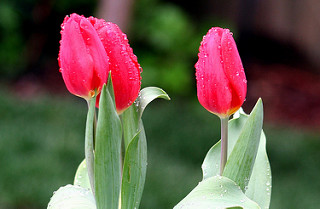

In [18]:
Image.open("archive\\flowers\\tulip\\100930342_92e8746431_n.jpg")

In [19]:
image_check = images_data[3339,:].reshape(hwdim, -1).copy()

In [20]:
image_check.shape

(64, 64)

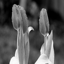

In [21]:
Image.fromarray(image_check) #.show()

In [22]:
from sklearn.preprocessing import LabelEncoder 

In [23]:
from tensorflow.keras.utils import to_categorical

In [24]:
labelencoder = LabelEncoder()

In [25]:
label_data_encoded = labelencoder.fit_transform(label_data)

In [26]:
label_categorical = to_categorical(label_data_encoded)

In [27]:
label_categorical[3339]

array([0., 0., 0., 0., 1.], dtype=float32)

In [28]:
from sklearn import preprocessing

In [29]:
#standard_scaler = preprocessing.StandardScaler()
#images_data_scaled = standard_scaler.fit_transform(images_data)
min_max_scaler = preprocessing.MinMaxScaler()
images_data_scaled = min_max_scaler.fit_transform(images_data)

In [30]:
images_data[3339,:]

array([38, 33, 25, ..., 87, 93, 93], dtype=uint8)

In [31]:
images_data_scaled[3339,:]

array([0.14901961, 0.12941176, 0.09803922, ..., 0.34117647, 0.36470588,
       0.36470588])

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
flowers_trainval, flowers_test, labels_trainval, labels_test = train_test_split(images_data_scaled, label_categorical, test_size=0.3, random_state=42)

In [34]:
print(flowers_trainval.shape)
print(flowers_test.shape)
print(labels_trainval.shape)
print(labels_test.shape)

(3026, 4096)
(1297, 4096)
(3026, 5)
(1297, 5)


In [35]:
#Image.fromarray(flowers_trainval[3025,:].reshape(128, -1).copy())

In [36]:
#print(labels_trainval[3025])

In [37]:
flowers_train, flowers_val, labels_train, labels_val = train_test_split(flowers_trainval, labels_trainval, test_size=0.285, random_state=42)

In [38]:
print(flowers_train.shape)
print(flowers_val.shape)
print(labels_train.shape)
print(labels_val.shape)

(2163, 4096)
(863, 4096)
(2163, 5)
(863, 5)


In [39]:
from tensorflow.keras import layers
from tensorflow.keras import models

In [40]:
def build_model():
    model = models.Sequential()
    model.add(layers.Dense(16384, activation='relu', input_shape=(hwdim*hwdim,)))
    model.add(layers.Dense(4096, activation='relu'))
    #model.add(layers.Dense(2048, activation='relu'))
    model.add(layers.Dense(1024, activation='relu'))
    #model.add(layers.Dense(512, activation='relu'))
    model.add(layers.Dense(256, activation='relu'))
    #model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(64, activation='relu'))
    #model.add(layers.Dense(32, activation='relu'))
    model.add(layers.Dense(5, activation='softmax'))
    model.compile(loss='categorical_crossentropy', metrics=['categorical_accuracy'], optimizer='rmsprop')
    return model

In [41]:
model = build_model()

In [42]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16384)             67125248  
_________________________________________________________________
dense_1 (Dense)              (None, 4096)              67112960  
_________________________________________________________________
dense_2 (Dense)              (None, 1024)              4195328   
_________________________________________________________________
dense_3 (Dense)              (None, 256)               262400    
_________________________________________________________________
dense_4 (Dense)              (None, 64)                16448     
_________________________________________________________________
dense_5 (Dense)              (None, 5)                 325       
Total params: 138,712,709
Trainable params: 138,712,709
Non-trainable params: 0
__________________________________________

In [43]:
history = model.fit(flowers_train, labels_train, epochs=10, batch_size = 128, validation_data = (flowers_val, labels_val))

Epoch 1/10
17/17 [==============================] - 32s 2s/step - loss: 53.3447 - categorical_accuracy: 0.2122 - val_loss: 1.6048 - val_categorical_accuracy: 0.2097
Epoch 2/10
17/17 [==============================] - 30s 2s/step - loss: 1.6544 - categorical_accuracy: 0.2409 - val_loss: 1.7031 - val_categorical_accuracy: 0.2283
Epoch 3/10
17/17 [==============================] - 30s 2s/step - loss: 1.7241 - categorical_accuracy: 0.2538 - val_loss: 1.6472 - val_categorical_accuracy: 0.2294
Epoch 4/10
17/17 [==============================] - 30s 2s/step - loss: 1.6347 - categorical_accuracy: 0.2575 - val_loss: 1.5809 - val_categorical_accuracy: 0.2607
Epoch 5/10
17/17 [==============================] - 31s 2s/step - loss: 1.5892 - categorical_accuracy: 0.2534 - val_loss: 1.5961 - val_categorical_accuracy: 0.2202
Epoch 6/10
17/17 [==============================] - 31s 2s/step - loss: 1.6115 - categorical_accuracy: 0.2409 - val_loss: 1.6268 - val_categorical_accuracy: 0.2329
Epoch 7/10
17/1

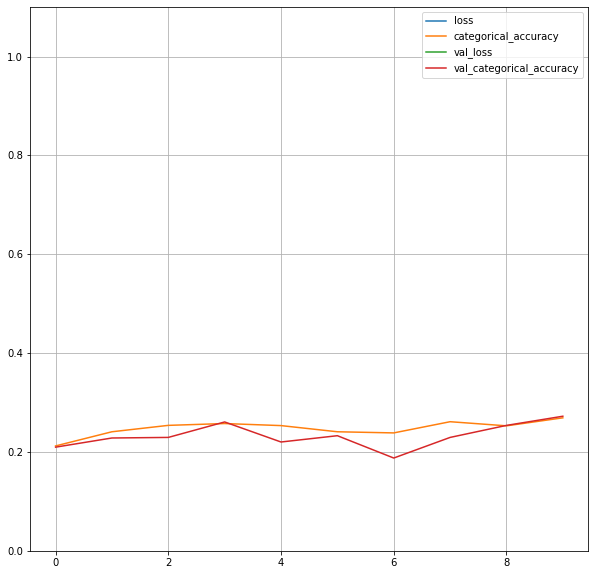

In [44]:
pd.DataFrame(history.history).plot(figsize = (10,10))
plt.grid(True)
plt.gca().set_ylim(0,1.1)
plt.show()